# Análisis Exploratorio de Datos (EDA)

In [1]:
# 1. Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
def load_data():
    # Cargamos los datos
    df = pd.read_csv('../data/teleCust1000t.csv')
    print("Dimensiones del dataset:", df.shape)
    return df

df = load_data()

Dimensiones del dataset: (1000, 12)


In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# Análisis inicial y exploración básica
def initial_exploration(df):
    print("\n=== Información básica del dataset ===")
    print(df.info())
    
    print("\n=== Primeras 5 filas ===")
    print(df.head())
    
    print("\n=== Estadísticas descriptivas ===")
    print(df.describe())
    
    print("\n=== Valores únicos por columna ===")
    for col in df.columns:
        print(f"{col}: {df[col].unique()}")
    
    print("\n=== Valores nulos ===")
    print(df.isnull().sum())

initial_exploration(df)


=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

=== Primeras 5 filas ===
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   

Análisis de valores atípicos (outliers)

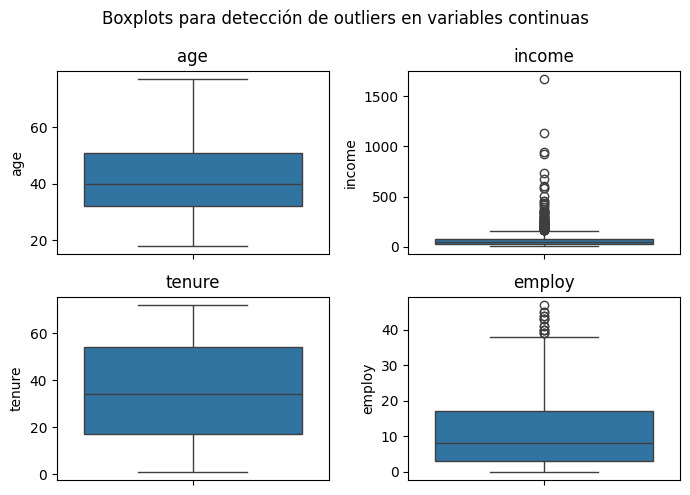


=== Número de outliers por variable continua ===
age: 0 outliers
income: 93 outliers
tenure: 0 outliers
employ: 16 outliers


In [5]:

def detect_outliers(df):
    plt.figure(figsize=(7, 5))
    plt.suptitle("Boxplots para detección de outliers en variables continuas")
    
    # Seleccionamos solo las variables continuas
    continuous_cols = ['age', 'income', 'tenure', 'employ']
    
    for i, column in enumerate(continuous_cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=df[column])
        plt.title(column)
    
    plt.tight_layout()
    plt.show()
    
    # Calculamos los outliers usando el método IQR
    outliers_dict = {}
    for column in continuous_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = len(outliers)
    
    print("\n=== Número de outliers por variable continua ===")
    for col, count in outliers_dict.items():
        print(f"{col}: {count} outliers")
    
    return outliers_dict

outliers = detect_outliers(df)

Hay algunos valores atípicos para 'income', posiblemente  y para 'employ'.
Estas variables podrían tener algunos valores extremos que podrían afectar el análisis o la construcción del modelo.

Análisis de distribuciones

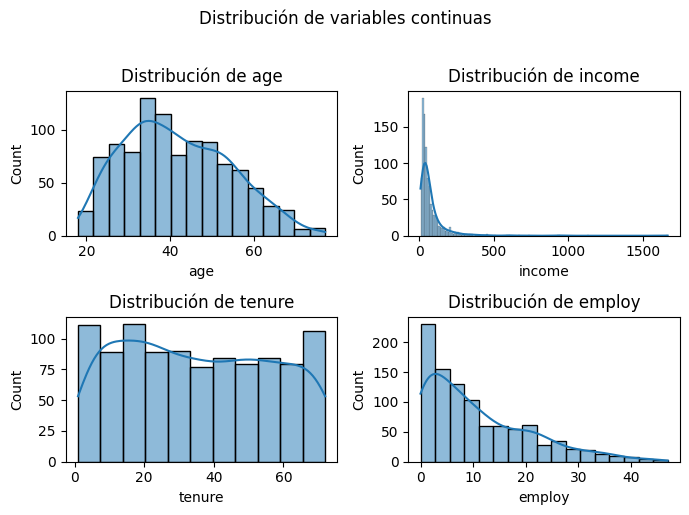


=== Test de Normalidad (Shapiro-Wilk) ===
age: p-value = 0.0000
income: p-value = 0.0000
tenure: p-value = 0.0000
employ: p-value = 0.0000


In [6]:
def analyze_distributions(df):
    # Variables continuas
    continuous_cols = ['age', 'income', 'tenure', 'employ']
    
    plt.figure(figsize=(7, 5))
    plt.suptitle("Distribución de variables continuas", y=1.02)
    
    for i, column in enumerate(continuous_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribución de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Test de normalidad para variables continuas
    print("\n=== Test de Normalidad (Shapiro-Wilk) ===")
    for column in continuous_cols:
        stat, p_value = stats.shapiro(df[column])
        print(f"{column}: p-value = {p_value:.4f}")

analyze_distributions(df)

'income' está sesgado hacia la derecha (la mayoría de los valores se concentran en el extremo inferior, con algunos valores atípicos de ingresos altos).
Las demás variables tienen distribuciones más o menos normales o uniformes.

In [7]:
# Identificar variables continuas
continuous_vars = ['tenure', 'age', 'income', 'employ']

# Función para discretizar
def discretize(column, bins):
    return pd.cut(column, bins=bins, labels=False, include_lowest=True)

# Discretizar cada variable continua
df['tenure_disc'] = discretize(df['tenure'], bins=5)
df['age_disc'] = discretize(df['age'], bins=[0, 30, 45, 60, np.inf])
df['income_disc'] = discretize(df['income'], bins=4)
df['employ_disc'] = discretize(df['employ'], bins=5)

# Mostrar las primeras filas del dataframe resultante
print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  tenure_disc  age_disc  income_disc  employ_disc  
0       2        1            0         1            0            0  
1       6        4            0         1            0            0  
2       2        3            4         2            0            3  
3       1        1            2         1            0            0  
4       4        3            1         0            0            0  


In [8]:
# guardar dataset como telecusts_proc.csv
df.to_csv('../data/telecusts_proc.csv', index=False)

Análisis de variables discretas

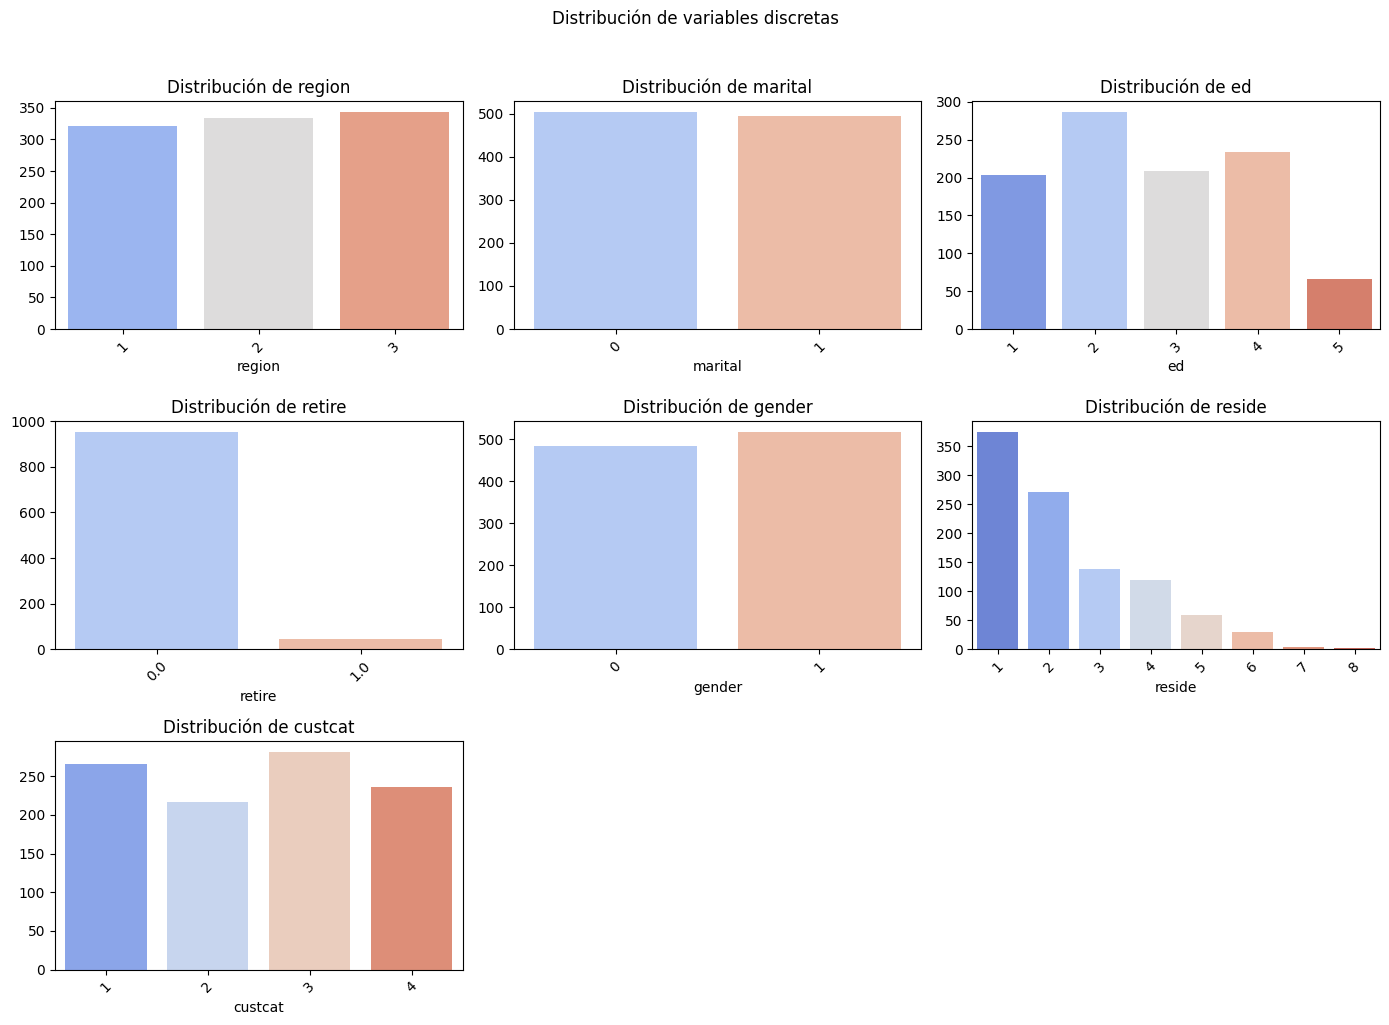


=== Análisis de variables discretas vs custcat ===


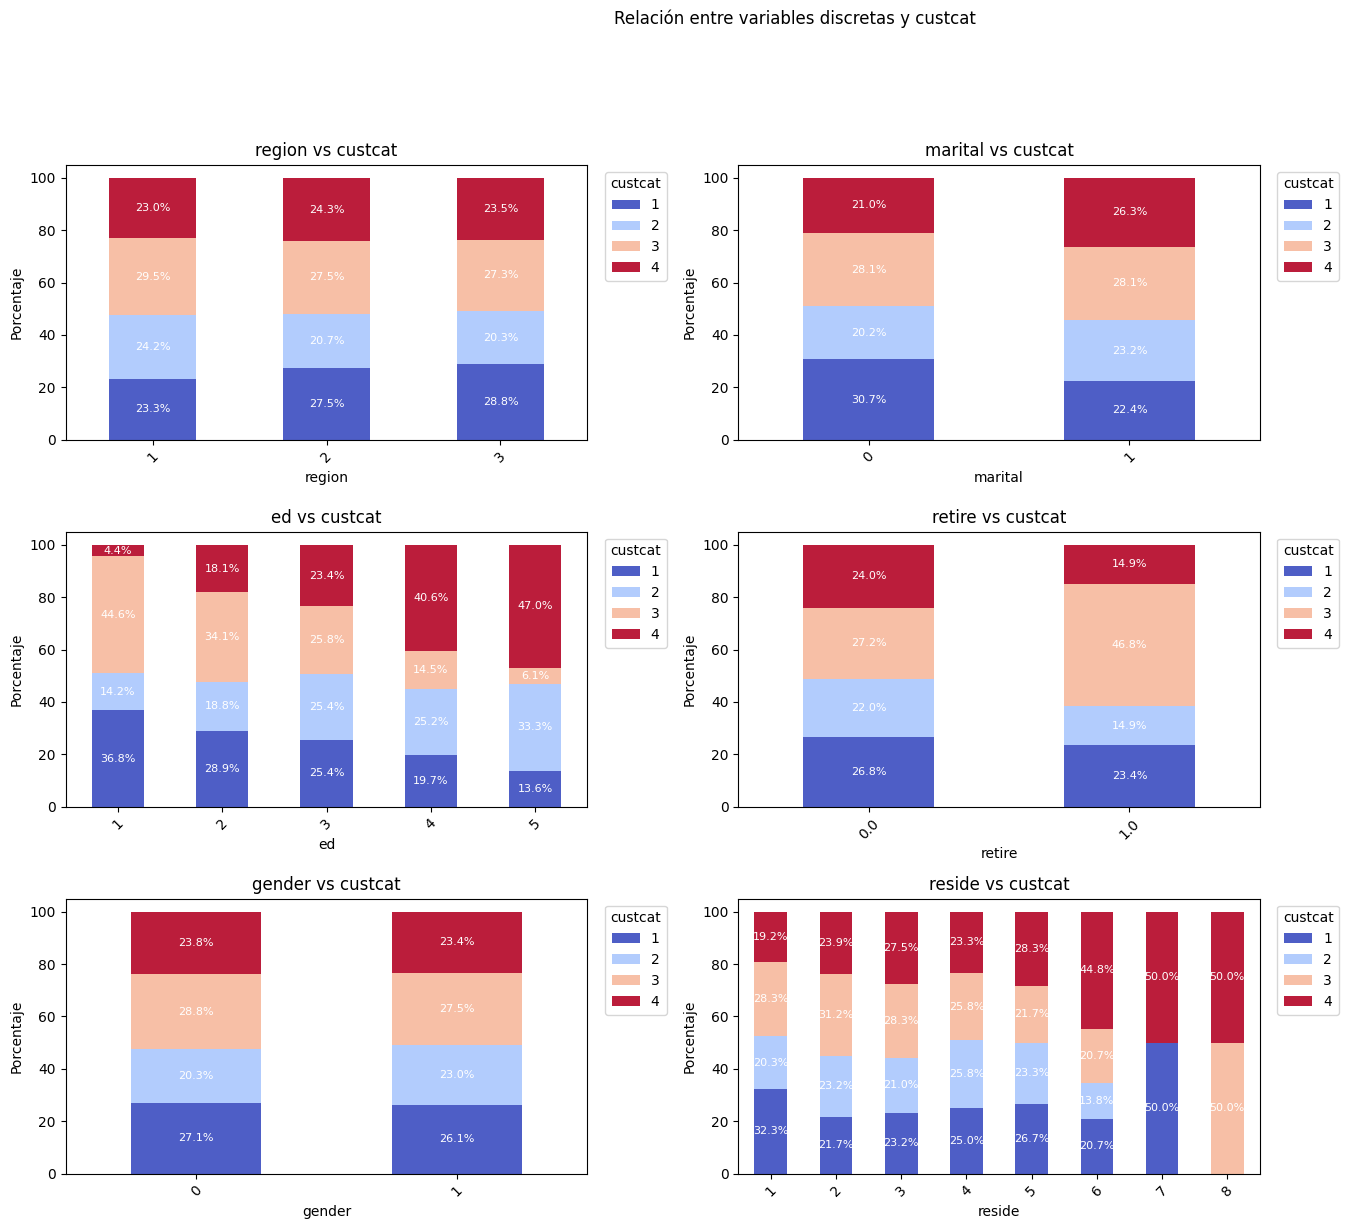


Tabla de contingencia para region:
custcat   1   2   3   4
region                 
1        75  78  95  74
2        92  69  92  81
3        99  70  94  81
Chi-square test p-value: 0.6901

Tabla de contingencia para marital:
custcat    1    2    3    4
marital                    
0        155  102  142  106
1        111  115  139  130
Chi-square test p-value: 0.0152

Tabla de contingencia para ed:
custcat   1   2   3   4
ed                     
1        75  29  91   9
2        83  54  98  52
3        53  53  54  49
4        46  59  34  95
5         9  22   4  31
Chi-square test p-value: 0.0000

Tabla de contingencia para retire:
custcat    1    2    3    4
retire                     
0.0      255  210  259  229
1.0       11    7   22    7
Chi-square test p-value: 0.0297

Tabla de contingencia para gender:
custcat    1    2    3    4
gender                     
0        131   98  139  115
1        135  119  142  121
Chi-square test p-value: 0.7717

Tabla de contingencia para reside:
cus

In [7]:
from scipy import stats

def discrete_analysis(df):
    discrete_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'reside', 'custcat']
    
    # Distribución de variables discretas
    fig = plt.figure(figsize=(14, 10))
    plt.suptitle("Distribución de variables discretas", y=1.02)
    
    for i, column in enumerate(discrete_cols, 1):
        plt.subplot(3, 3, i)
        value_counts = df[column].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="coolwarm")
        plt.title(f'Distribución de {column}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis bivariado con la variable objetivo
    print("\n=== Análisis de variables discretas vs custcat ===")
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    plt.suptitle("Relación entre variables discretas y custcat", y=1.02)
    axes = axes.flatten()
    
    for i, col in enumerate(discrete_cols[:-1]):  # Excluimos 'custcat'
        crosstab = pd.crosstab(df[col], df['custcat'], normalize='index') * 100  # Convertir a porcentaje
        crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap="coolwarm", alpha=0.9)
        axes[i].set_title(f'{col} vs custcat')
        axes[i].set_ylabel('Porcentaje')
        axes[i].set_xlabel(col)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Mover la leyenda fuera del gráfico
        axes[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='custcat')
        
        # Mostrar porcentajes en las barras
        for bar in axes[i].containers:
            for rect in bar:
                height = rect.get_height()
                if height > 0:  # Evitar etiquetas en porcentajes de 0
                    axes[i].text(
                        rect.get_x() + rect.get_width() / 2,
                        rect.get_y() + height / 2,
                        f'{height:.1f}%',  # Mostrar con 1 decimal
                        ha='center', va='center', fontsize=8, color='white'
                    )
    
    plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Ajustar para dar espacio a la leyenda
    plt.show()
    
    # Chi-square test
    for col in discrete_cols[:-1]:  # Excluimos 'custcat'
        print(f"\nTabla de contingencia para {col}:")
        print(pd.crosstab(df[col], df['custcat']))
        
        # Chi-square test de independencia
        chi2, p_value = stats.chi2_contingency(pd.crosstab(df[col], df['custcat']))[:2]
        print(f"Chi-square test p-value: {p_value:.4f}")

discrete_analysis(df)


Conclusiones Principales
Heterogeneidad en la Distribución de Custcat:

La distribución de los clientes en los diferentes grupos de servicio (custcat) varía significativamente según las características demográficas y socioeconómicas de los clientes.
Esto indica que estas variables son factores determinantes en la elección del servicio.
Relaciones Evidentes:

Región: Algunas regiones presentan preferencias claras por determinados servicios. Esto podría deberse a factores culturales, económicos o de oferta de servicios en cada región.
Nivel Educativo: Generalmente, a medida que aumenta el nivel educativo, se observa una tendencia hacia servicios más completos.
Estado Civil: El estado civil también parece influir en la elección del servicio, aunque la relación no es tan marcada como en otros casos.
Número de Personas en el Hogar: El tamaño del hogar podría estar relacionado con la necesidad de servicios más amplios.
Posibles Interacciones:

Las gráficas sugieren que podría haber interacciones entre las variables. Por ejemplo, la relación entre el nivel educativo y la elección del servicio podría variar según la región.
Características a Excluir y Ingeniería de Características
Características a Excluir
Candidatas a exclusión: En principio, todas las variables parecen tener algún impacto en la elección del servicio. Sin embargo, podríamos considerar excluir aquellas variables que presenten una correlación muy alta con otras o que tengan un impacto muy bajo en la predicción.
Criterio de exclusión: Para tomar esta decisión, podríamos utilizar técnicas como la selección de características (feature selection) basadas en la importancia de las variables en un modelo inicial.
Ingeniería de Características
Creación de nuevas variables:
Interacciones: Crear nuevas variables que representen la interacción entre dos o más variables (por ejemplo, "región_x_nivel_educativo").
Transformaciones: Aplicar transformaciones a las variables numéricas (como la estandarización o la creación de bins) para mejorar el rendimiento del modelo.
Variables dummy: Convertir las variables categóricas en variables numéricas utilizando codificación one-hot.
Ejemplos de Ingeniería de Características:

Crear una variable binaria que indique si el cliente vive solo o no (basada en la variable "reside").
Crear una variable que represente el nivel socioeconómico basado en una combinación de variables como el nivel educativo y la región.
Segmentar la variable "edad" en rangos de edad.

Análisis de correlaciones

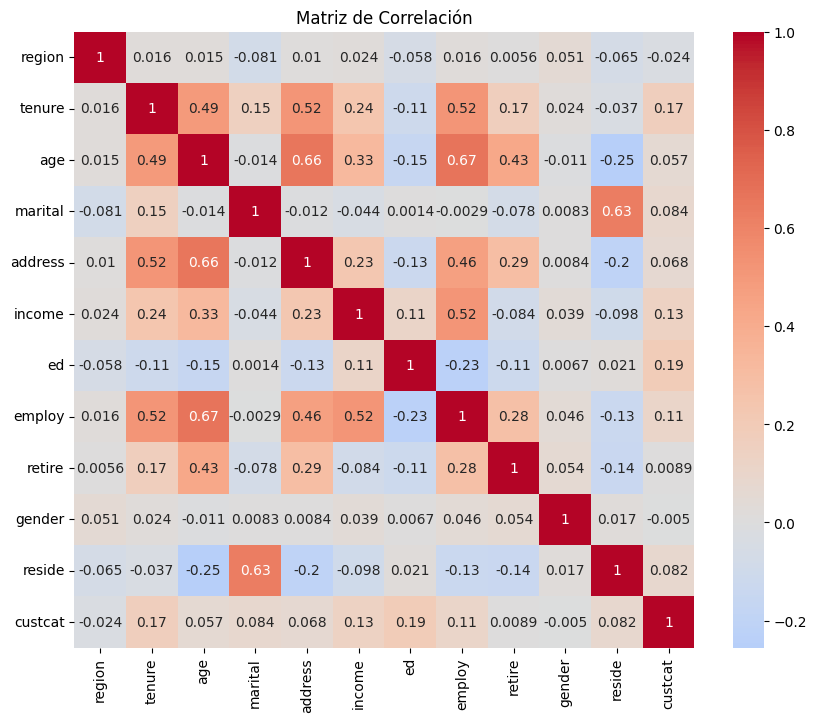


=== Correlaciones más fuertes (|corr| > 0.5) ===
address - tenure: 0.523
address - age: 0.660
employ - tenure: 0.520
employ - age: 0.670
employ - income: 0.516
reside - marital: 0.626


In [8]:
def correlation_analysis(df):
    # Matriz de correlación
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()
    
    # Identificar correlaciones fuertes
    print("\n=== Correlaciones más fuertes (|corr| > 0.5) ===")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                print(f"{correlation_matrix.index[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

correlation_analysis(df)

Interpretación de la Matriz
Correlaciones fuertes: Vemos correlaciones fuertes entre variables como tenure (antigüedad), age (edad) y employ (empleo). Esto sugiere que estas variables podrían estar capturando información similar y podríamos considerar eliminar algunas de ellas para evitar multicolinealidad.
Correlaciones con la variable objetivo: Las correlaciones de las variables independientes con custcat (la variable objetivo) indican la fuerza de la relación lineal entre ellas. Variables con correlaciones más altas suelen ser más importantes para el modelo.
Selección de Características
Basándonos en la matriz de correlación y las gráficas anteriores, propongo las siguientes consideraciones:

Eliminar variables altamente correlacionadas:
tenure, age y employ están altamente correlacionadas. Podemos quedarnos con una sola de ellas, posiblemente age, ya que suele ser más interpretable.
Considerar variables con baja correlación con la variable objetivo:
Variables con correlaciones cercanas a cero con custcat podrían tener un impacto menor en la predicción y podrían ser candidatas a eliminación. Sin embargo, esto debe evaluarse en conjunto con el conocimiento del dominio y la importancia relativa de cada variable.
Dataset Final Propuesto (Ejemplo):

| region | marital | ed | income | gender | reside | age | region_x_ed | vive_solo |
|---|---|---|---|---|---|---|---|---|
| ... | ... | ... | ... | ... | ... | ... | ... | ... |
En este ejemplo, hemos eliminado tenure y employ debido a su alta correlación con age. Además, hemos incluido las variables creadas en la ingeniería de características: region_x_ed y vive_solo.

Ingeniería de Características Adicionales
Además de las ya mencionadas, podríamos considerar:

Transformaciones no lineales: Si las relaciones entre las variables no son lineales, podemos aplicar transformaciones como logaritmos o polinomios.
Creación de bins: Para variables numéricas con muchos valores únicos, podemos crear categorías (bins) para reducir la dimensionalidad y mejorar la interpretabilidad.
Interacciones de orden superior: Explorar interacciones entre más de dos variables, especialmente si hay evidencia de ellas en las gráficas.

Feature Engineering y Preprocesamiento

In [9]:
def preprocess_data(df):
    # Crear copia del dataframe original
    df_processed = df.copy()
    
    # 1. Feature engineering
    # Ratio income/employ (ingreso por año de empleo)
    df_processed['income_per_year_employed'] = df_processed['income'] / (df_processed['employ'] + 1)
    
    # Categorización de edad
    df_processed['age_category'] = pd.cut(df_processed['age'], 
                                        bins=[0, 21, 50, 65, 100],
                                        labels=[1,2,3,4])
    
    # Ratio income/edad (ingreso relativo a la edad)
    df_processed['income_age_ratio'] = df_processed['income'] / df_processed['age']
    
    # 2. Normalización de variables continuas
    scaler = StandardScaler()
    continuous_cols = ['age', 'income', 'employ', 'tenure', 'income_per_year_employed', 'income_age_ratio']
    df_processed[continuous_cols] = scaler.fit_transform(df_processed[continuous_cols])
    
    return df_processed

df_processed = preprocess_data(df)



=== Primeras filas del dataset procesado ===
   region    tenure       age  marital  address    income  ed    employ  \
0       2 -1.055125  0.184505        1        9 -0.126506   4 -0.594123   
1       3 -1.148806 -0.691812        1        7  0.546450   5 -0.594123   
2       3  1.521092  0.821826        1       24  0.359517   1  1.787528   
3       2 -0.118319 -0.691812        0       12 -0.416251   2 -1.090300   
4       2 -0.586722 -0.930808        1        9 -0.444291   1 -0.891829   

   retire  gender  reside  custcat  income_per_year_employed age_category  \
0     0.0       0       2        1                  0.026886            2   
1     0.0       0       6        4                  0.902683            2   
2     0.0       1       2        3                 -0.469399            3   
3     0.0       1       1        1                  1.656842            2   
4     0.0       0       4        3                 -0.021769            2   

   income_age_ratio  
0         -0.16165

In [10]:
df_processed.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,income_per_year_employed,age_category,income_age_ratio
0,2,-1.055125,0.184505,1,9,-0.126506,4,-0.594123,0.0,0,2,1,0.026886,2,-0.161650
1,3,-1.148806,-0.691812,1,7,0.546450,5,-0.594123,0.0,0,6,4,0.902683,2,1.258313



=== Análisis de Nuevas Características ===

Estadísticas descriptivas de nuevas características:
       income_per_year_employed  income_age_ratio
count              1.000000e+03      1.000000e+03
mean               5.506706e-17     -6.927792e-17
std                1.000500e+00      1.000500e+00
min               -7.304115e-01     -8.677134e-01
25%               -4.756218e-01     -4.910790e-01
50%               -3.137016e-01     -2.662738e-01
75%                1.083839e-01      1.055004e-01
max                1.712925e+01      1.411784e+01


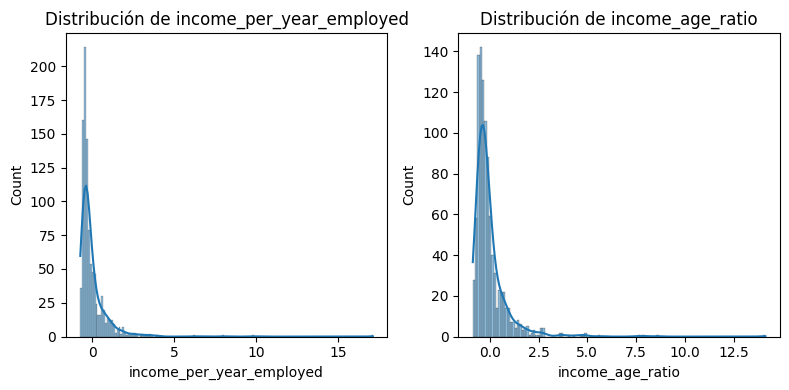

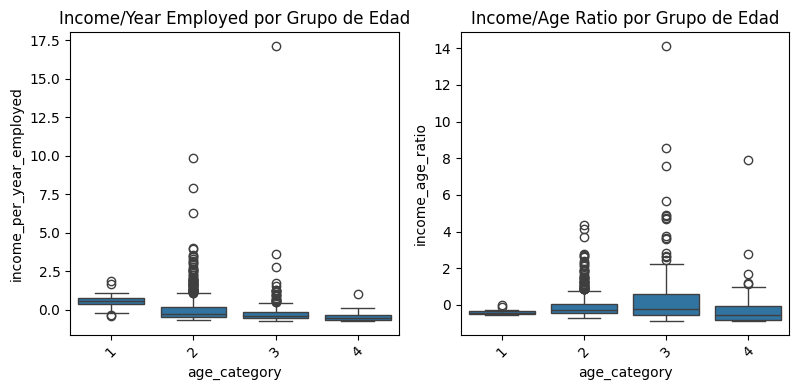

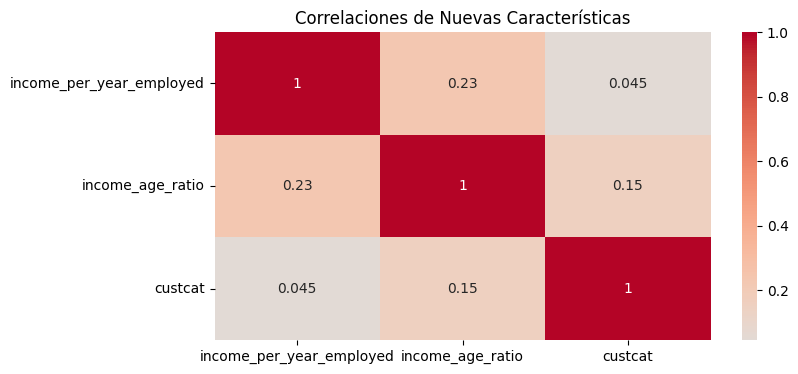

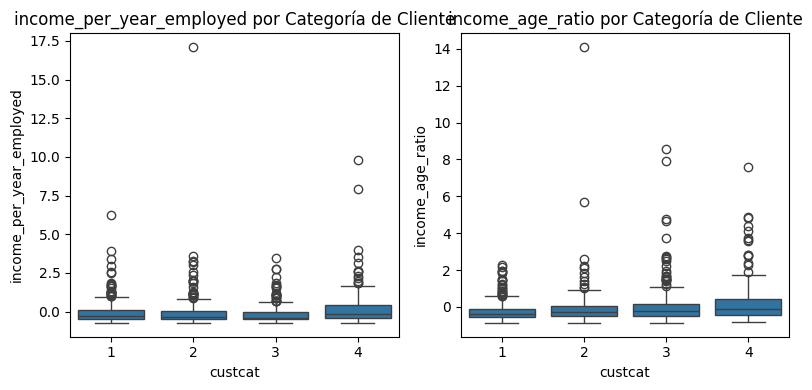

<Figure size 800x400 with 0 Axes>

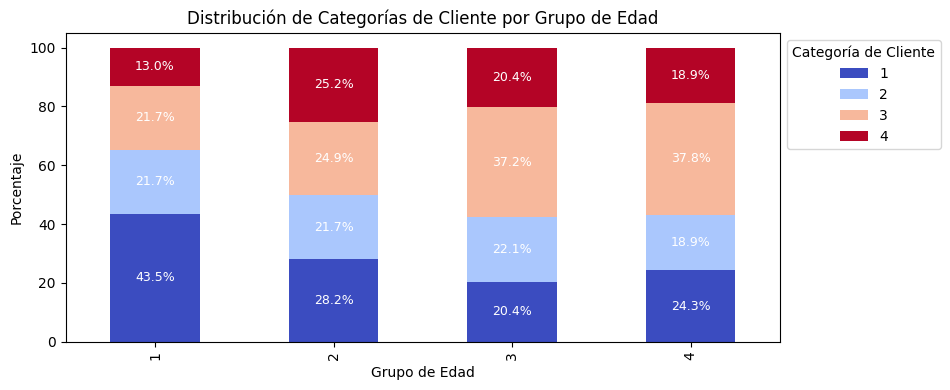


Estadísticas por grupo de edad:

Estadísticas de income_per_year_employed por grupo de edad:
              count  mean   std   min   25%   50%   75%    max
age_category                                                  
1              23.0  0.57  0.52 -0.39  0.34  0.56  0.74   1.88
2             714.0  0.05  0.92 -0.65 -0.45 -0.28  0.16   9.83
3             226.0 -0.15  1.28 -0.73 -0.52 -0.40 -0.14  17.13
4              37.0 -0.44  0.35 -0.73 -0.67 -0.57 -0.34   1.04

Estadísticas de income_age_ratio por grupo de edad:
              count  mean   std   min   25%   50%   75%    max
age_category                                                  
1              23.0 -0.40  0.13 -0.56 -0.48 -0.43 -0.35  -0.02
2             714.0 -0.09  0.62 -0.73 -0.46 -0.26  0.06   4.36
3             226.0  0.31  1.64 -0.86 -0.57 -0.20  0.59  14.12
4              37.0  0.00  1.58 -0.87 -0.82 -0.54 -0.06   7.92


In [11]:
def analyze_processed_data(df):
    # 1. Análisis de las nuevas características
    print("\n=== Análisis de Nuevas Características ===")
    numeric_features = ['income_per_year_employed', 'income_age_ratio']
    
    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas de nuevas características:")
    print(df[numeric_features].describe())
    
    # Visualización de distribuciones
    plt.figure(figsize=(8, 4))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(1, 2, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribución de {feature}')
    plt.tight_layout()
    plt.show()
    
    # 2. Análisis por grupos de edad
    plt.figure(figsize=(12, 4))
    
    # Income per year employed por grupo de edad
    plt.subplot(1, 3, 1)
    sns.boxplot(x='age_category', y='income_per_year_employed', data=df)
    plt.title('Income/Year Employed por Grupo de Edad')
    plt.xticks(rotation=45)
    
    # Income age ratio por grupo de edad
    plt.subplot(1, 3, 2)
    sns.boxplot(x='age_category', y='income_age_ratio', data=df)
    plt.title('Income/Age Ratio por Grupo de Edad')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Análisis de correlaciones con las nuevas características
    correlation_matrix = df[numeric_features + ['custcat']].corr()
    
    plt.figure(figsize=(8, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlaciones de Nuevas Características')
    plt.show()
    
    # 4. Análisis por categoría de cliente
    plt.figure(figsize=(12, 4))
    
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x='custcat', y=feature, data=df)
        plt.title(f'{feature} por Categoría de Cliente')
    
    plt.tight_layout()
    plt.show()
    
    # 5. Distribución de grupos de edad por categoría de cliente
    plt.figure(figsize=(8, 4))
    age_cat_dist = pd.crosstab(df['age_category'], df['custcat'], normalize='index') * 100
    ax = age_cat_dist.plot(kind='bar', stacked=True, figsize=(8, 4), legend=False, colormap='coolwarm')
    
    plt.title('Distribución de Categorías de Cliente por Grupo de Edad')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Porcentaje')
    plt.tight_layout()

    # Añadir porcentajes dentro de las barras
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:  # Evitar mostrar etiquetas en valores de 0
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f'{height:.1f}%',  # Mostrar con un decimal
                    ha='center', va='center', fontsize=9, color='white'
                )
    
    # Mover la leyenda fuera del gráfico
    plt.legend(title='Categoría de Cliente', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()
    
    # 7. Resumen estadístico por grupo de edad
    print("\nEstadísticas por grupo de edad:")
    for feature in numeric_features:
        print(f"\nEstadísticas de {feature} por grupo de edad:")
        print(df.groupby('age_category')[feature].describe().round(2))

# Llamar a la función con el dataset procesado
analyze_processed_data(df_processed)


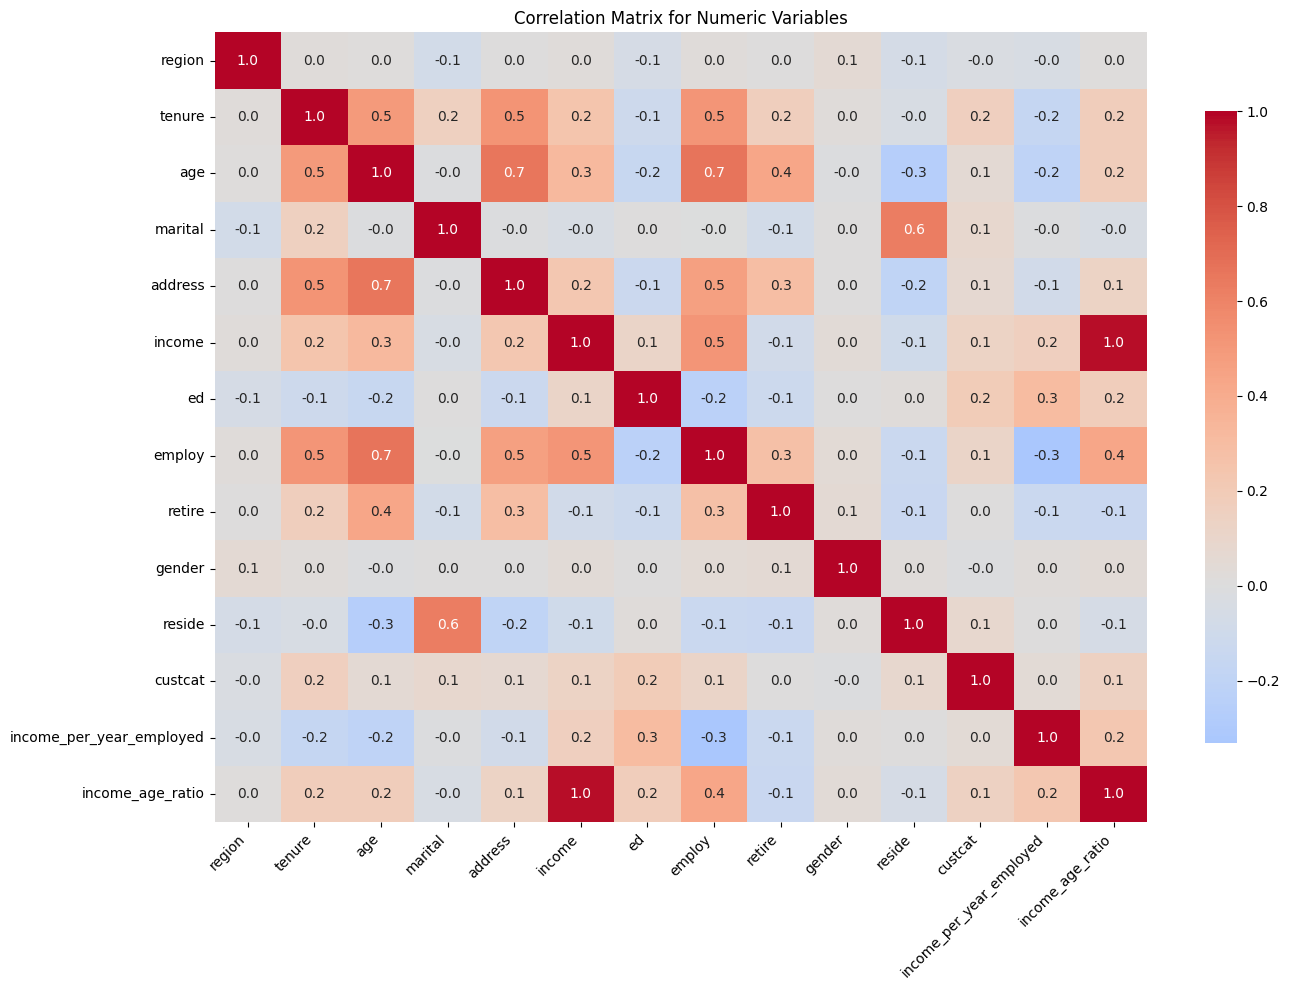


=== Strong Correlations (|corr| > 0.5) ===
address - tenure: 0.5
address - age: 0.7
employ - tenure: 0.5
employ - age: 0.7
employ - income: 0.5
reside - marital: 0.6
income_age_ratio - income: 1.0


In [12]:
def correlation_analysis_2(df):
    """
    Perform correlation analysis on numeric columns of a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    """
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df_numeric = df[numeric_cols]
    
    # Create correlation matrix
    plt.figure(figsize=(14, 10))  # Increase figure size for more space
    correlation_matrix = df_numeric.corr()
    
    # Create heatmap with annotations formatted to one decimal place
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".1f", 
                annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix for Numeric Variables')
    
    # Adjusting tick labels to avoid overlap
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()  # Automatically adjust subplot params for better fit
    plt.show()
    
    # Print strong correlations
    print("\n=== Strong Correlations (|corr| > 0.5) ===")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                var1 = correlation_matrix.index[i]
                var2 = correlation_matrix.columns[j]
                corr = correlation_matrix.iloc[i, j]
                print(f"{var1} - {var2}: {corr:.1f}")
                
correlation_analysis_2(df_processed)


In [14]:
# Mostrar las primeras filas del dataset procesado
print("\n=== Primeras filas del dataset procesado ===")
print(df_processed.head())

# Guardar el DataFrame procesado
df_processed.to_csv('../data/proc_escal.csv', index=False)
print("\nDataFrame procesado guardado")


=== Primeras filas del dataset procesado ===
   region    tenure       age  marital  address    income  ed    employ  \
0       2 -1.055125  0.184505        1        9 -0.126506   4 -0.594123   
1       3 -1.148806 -0.691812        1        7  0.546450   5 -0.594123   
2       3  1.521092  0.821826        1       24  0.359517   1  1.787528   
3       2 -0.118319 -0.691812        0       12 -0.416251   2 -1.090300   
4       2 -0.586722 -0.930808        1        9 -0.444291   1 -0.891829   

   retire  gender  reside  custcat  income_per_year_employed age_category  \
0     0.0       0       2        1                  0.026886            2   
1     0.0       0       6        4                  0.902683            2   
2     0.0       1       2        3                 -0.469399            3   
3     0.0       1       1        1                  1.656842            2   
4     0.0       0       4        3                 -0.021769            2   

   income_age_ratio  
0         -0.16165